<a href="https://www.kaggle.com/code/hazmannaim/classifying-galaxies-quasars-and-stars?scriptVersionId=141337129" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Differentiating Galaxies, Quasars, and Stars through Utilization of Various Classification Algorithms with SDSS Sky Survey Data

Hello all! I appreciate your time in reviewing my notebooks.

In this particular notebook, I'm employing classification algorithms to categorize galaxies, quasars, and stars using the SDSS Sky Survey data. The algorithms I've employed include Logistic Regression, Support Vector Classifier, and Random Forest Classifier. These algorithms are foundational and typically accessible to beginners.

If you have any feedback or suggestions, please feel welcome to share them.

Furthermore, if you possess any insights for enhancements, I'm eager to learn and value all the feedback and comments that come my way. Your input is invaluable as I continue to grow and develop my skills.

# 1. Prerequisite, Importing Libraries and Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sloan-digital-sky-survey-dr18/SDSS_DR18.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Data Preparation

Load the data file into the environment.

In [3]:
data=pd.read_csv(os.path.join(dirname, filename))

Let's examine the dimensions of the data.

In [4]:
print(data.shape)
print("Number of rows: "+str(data.shape[0]))
print("Number of columns: "+str(data.shape[1]))

(100000, 43)
Number of rows: 100000
Number of columns: 43


Examine the top 5 rows of the data.

In [5]:
data.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


# 3. Exploratory Data Analysis

In [6]:
column_drop = ["run", "rerun", "camcol", "field", "plate", "mjd", "fiberid"]
#column_drop = ["run", "rerun", "camcol", "field", "plate", "mjd", "fiberid", 'i', 'z', 'petroRad_i','petroRad_z', 'petroFlux_i', 'petroFlux_z', 'petroR50_i','petroR50_z', 'psfMag_i', 'psfMag_z','expAB_i', 'expAB_z']

data = data.drop(column_drop, axis=1)

Examine the basic numerical statistics of the data. This includes count, mean, standard deviation, min, quartile values (25%, 50%, 75%) and max.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,100000.0,1.240000e+18,0.000000e+00,1.240000e+18,1.240000e+18,1.240000e+18,1.240000e+18,1.240000e+18
specobjid,100000.0,1.859200e+18,2.265257e+18,2.990000e+17,5.280000e+17,6.980000e+17,2.750000e+18,1.410000e+19
ra,100000.0,1.688567e+02,8.384422e+01,3.091914e-03,1.288796e+02,1.680799e+02,2.145546e+02,3.599961e+02
dec,100000.0,1.783274e+01,2.634408e+01,-1.125282e+01,-5.377798e-01,2.899490e+00,4.691137e+01,6.873148e+01
u,100000.0,1.864114e+01,8.290346e-01,1.172647e+01,1.821431e+01,1.887801e+01,1.927575e+01,1.959999e+01
g,100000.0,1.740709e+01,9.746828e-01,1.169617e+01,1.685334e+01,1.752031e+01,1.805246e+01,1.997727e+01
r,100000.0,1.687855e+01,1.118858e+00,1.127709e+01,1.619476e+01,1.689607e+01,1.756559e+01,3.169816e+01
i,100000.0,1.651714e+01,3.169464e+01,-9.999000e+03,1.586200e+01,1.659474e+01,1.731010e+01,3.098087e+01
z,100000.0,1.615484e+01,5.487103e+01,-9.999000e+03,1.562027e+01,1.641904e+01,1.719387e+01,2.866870e+01
petroRad_u,100000.0,6.497004e+00,1.313434e+01,3.101849e-02,1.580248e+00,3.473864e+00,7.470103e+00,2.585186e+02


## Data Cleaning

Let’s examine if there are any missing values in our data.

In [8]:
data.isnull().sum()

objid          0
specobjid      0
ra             0
dec            0
u              0
g              0
r              0
i              0
z              0
petroRad_u     0
petroRad_g     0
petroRad_i     0
petroRad_r     0
petroRad_z     0
petroFlux_u    0
petroFlux_g    0
petroFlux_i    0
petroFlux_r    0
petroFlux_z    0
petroR50_u     0
petroR50_g     0
petroR50_i     0
petroR50_r     0
petroR50_z     0
psfMag_u       0
psfMag_r       0
psfMag_g       0
psfMag_i       0
psfMag_z       0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
redshift       0
class          0
dtype: int64

No missing values in our dataset. Let's identify duplicates in our dataset.

## Identify Duplicates

In [9]:
data.duplicated().sum()

0

No duplicates in our dataset.

## Visualization

In [10]:
data.columns.values

array(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r',
       'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g',
       'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'], dtype=object)

In [11]:
columns = ['u', 'g', 'r', 'i', 'z',
        'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
        'petroFlux_u', 'petroFlux_g', 'petroFlux_r', 'petroFlux_i', 'petroFlux_z',
        'petroR50_u', 'petroR50_g','petroR50_r', 'petroR50_i', 'petroR50_z',
        'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
        'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
        'redshift']

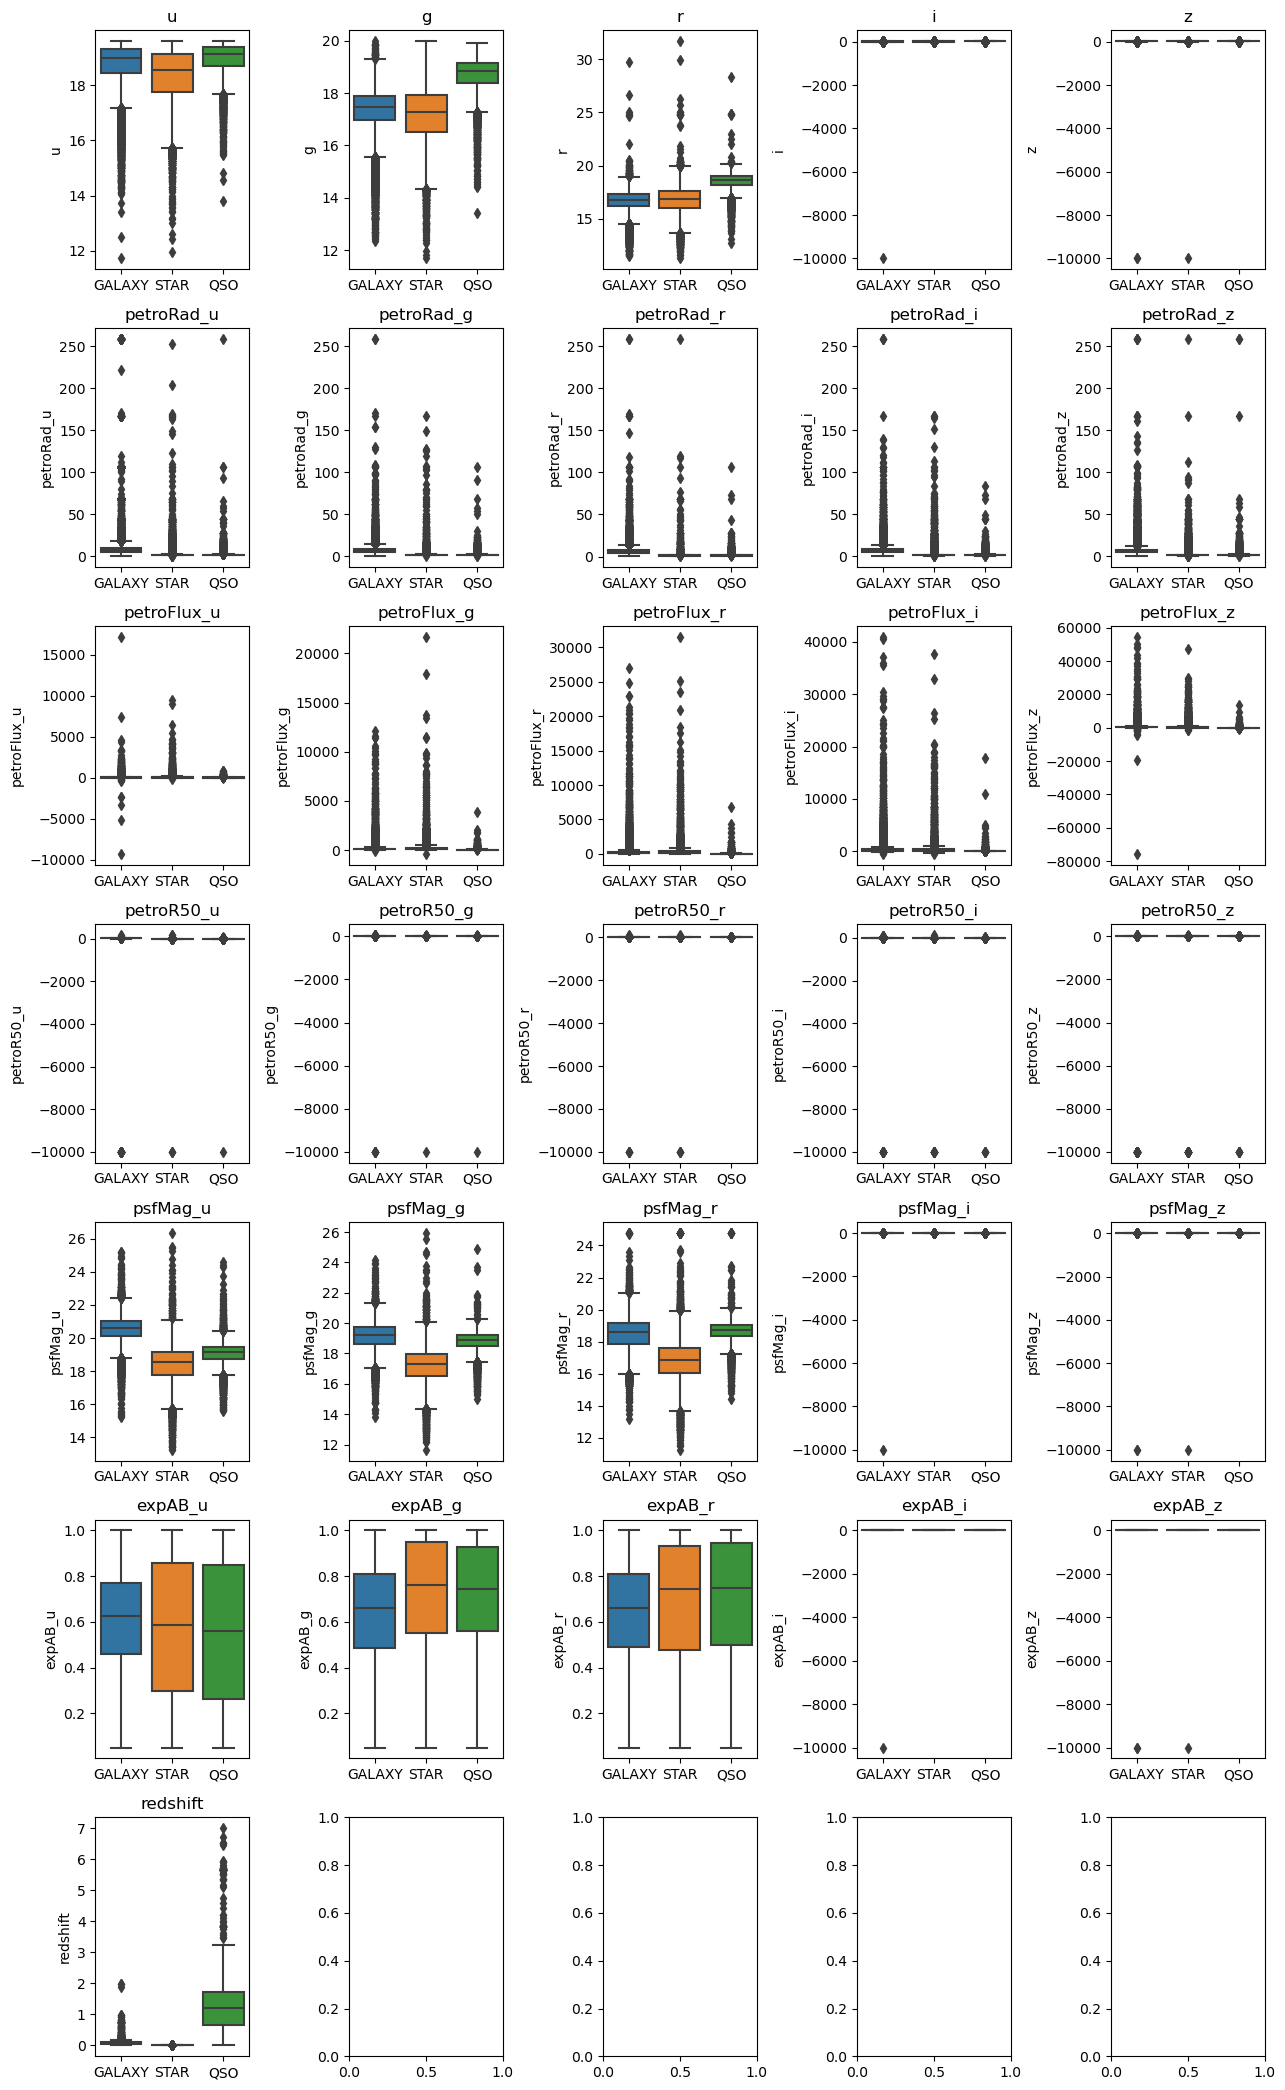

In [12]:
import math

# Assuming 'columns' is a list of column names and 'data' is your DataFrame

num_columns = len(columns)
num_rows = math.ceil(num_columns / 5)

# Create a grid of subplots with a flexible number of rows
fig, axs = plt.subplots(num_rows, 5, figsize=(13, 3* num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    if i < num_columns:
        # Select the appropriate subplot
        ax = axs[i]
        
        # Create a boxplot in the selected subplot
        sns.boxplot(x=data['class'], y=data[column], ax=ax)
        ax.set_title(column)
        ax.set_ylabel(column)
        
        # Remove x-label for better layout
        ax.set_xlabel('')
    else:
        # Hide any excess subplots
        fig.delaxes(axs[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Data Formatting

As our target variable is in text values, we need to replace text value with a number that can represent the class. Label Encoder tool helps us perform the task.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = data.drop('class',axis=1)
Y = le.fit_transform(data['class'])

In [14]:
le.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [15]:
le.inverse_transform([0,1,2])

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [16]:
dict(zip(le.inverse_transform([0,1,2]),[0,1,2]))

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}

# 4. Model Development

In [17]:
models_table = pd.DataFrame(columns=["Model",
                                     "Model Alias",
                                     "Detail",
                                     "Accuracy (Train)",
                                     "Log Loss (Train)",
                                     "Accuracy (Test)",
                                     "Log Loss (Test)",
                                     "Cross-validated Accuracy (Test)"])

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(X[columns], Y, stratify=Y, test_size = 0.2,random_state = 1)


scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
X_scaled = scaler.transform(X[columns])

print('Dataset:', X_scaled.shape )
print ('Train set:', x_train_scaled.shape,  y_train.shape)
print ('Test set:', x_test_scaled.shape,  y_test.shape)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Dataset: (100000, 31)
Train set: (80000, 31) (80000,)
Test set: (20000, 31) (20000,)
Train set: (80000, 31) (80000,)
Test set: (20000, 31) (20000,)


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression().fit(x_train,y_train)
lr1

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score

# Predict on the training data
y_train_pred = lr1.predict(x_train)
yhat_train_prob = lr1.predict_proba(x_train)

# Predict on the test data
y_test_pred = lr1.predict(x_test)
yhat_test_prob = lr1.predict_proba(x_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(lr1, X[columns], data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", log_loss_train)

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):", log_loss_test)

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Logistic Regression",
           "Model Alias":"lr1",
           "Detail":"Default",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": log_loss_train,
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": log_loss_test,
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 0.9154125
Log Loss (Train): 0.34206344911688663

Metrics on Test Data:
Accuracy (Test): 0.91395
Log Loss (Test): 0.3514698229160503

Cross-Validated Accuracy (Test): 0.9139999999999999


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.914


Confusion matrix, without normalization
[[10088   113   268]
 [  156  1513   416]
 [  397   371  6678]]


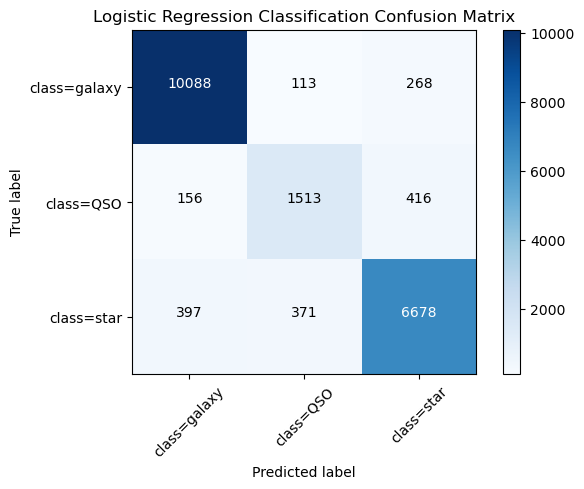

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Logistic Regression Classification Confusion Matrix')

### Logistic Regression Scaled

In [23]:
lr2 = LogisticRegression().fit(x_train_scaled,y_train)
lr2

LogisticRegression()

In [24]:
# Predict on the training data
y_train_pred = lr2.predict(x_train_scaled)
yhat_train_prob = lr2.predict_proba(x_train_scaled)

# Predict on the test data
y_test_pred = lr2.predict(x_test_scaled)
yhat_test_prob = lr2.predict_proba(x_test_scaled)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(lr2, X_scaled, data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", log_loss_train)

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):", log_loss_test)

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Logistic Regression",
           "Model Alias":"lr2",
           "Detail":"Default, Scaled",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": log_loss_train,
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": log_loss_test,
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 0.9898375
Log Loss (Train): 0.050863768899073965

Metrics on Test Data:
Accuracy (Test): 0.9884
Log Loss (Test): 0.05863787001129144

Cross-Validated Accuracy (Test): 0.98931


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.351470,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931


Confusion matrix, without normalization
[[10380    38    51]
 [  107  1976     2]
 [   28     6  7412]]


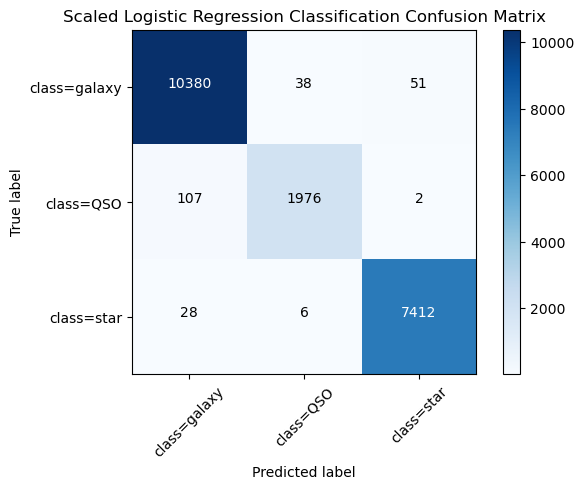

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Scaled Logistic Regression Classification Confusion Matrix')

## Support Vector Machine

In [26]:
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(x_train, y_train)
svm1

SVC()

In [27]:
# Predict on the training data
y_train_pred = svm1.predict(x_train)
#yhat_train_prob = svm1.predict_proba(x_train)

# Predict on the test data
y_test_pred = svm1.predict(x_test)
#yhat_test_prob = svm1.predict_proba(x_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
#log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
#log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(svm1, X, data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", '-')

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):",'-')

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Support Vector Classifier",
           "Model Alias":"svm1",
           "Detail":"Default",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": '-',
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": '-',
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 0.9181625
Log Loss (Train): -

Metrics on Test Data:
Accuracy (Test): 0.9131
Log Loss (Test): -

Cross-Validated Accuracy (Test): 0.7809699999999999


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931
2,Support Vector Classifier,svm1,Default,0.918162,-,0.91310,-,0.78097


Confusion matrix, without normalization
[[10005    97   367]
 [  204  1649   232]
 [  272   566  6608]]


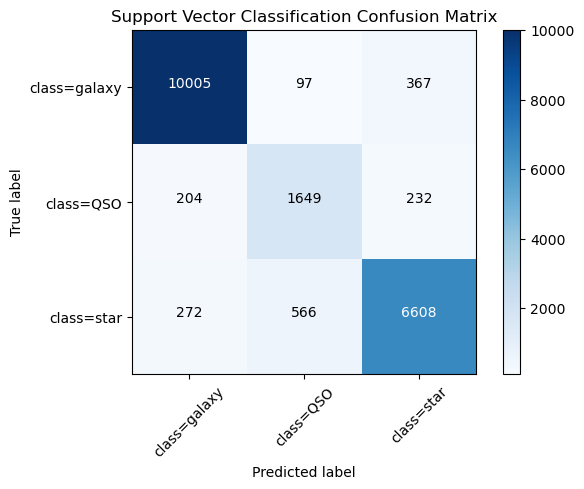

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Support Vector Classification Confusion Matrix')

### Support Vector Machine Scaled

In [29]:
svm2 = svm.SVC()
svm2.fit(x_train_scaled, y_train)
svm2

SVC()

In [30]:
# Predict on the training data
y_train_pred = svm2.predict(x_train_scaled)
#yhat_train_prob = svm1.predict_proba(x_train)

# Predict on the test data
y_test_pred = svm2.predict(x_test_scaled)
#yhat_test_prob = svm1.predict_proba(x_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
#log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
#log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(svm2, X_scaled, data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", '-')

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):",'-')

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Support Vector Classifier",
           "Model Alias":"svm2",
           "Detail":"Default, Scaled",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": '-',
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": '-',
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 0.99055
Log Loss (Train): -

Metrics on Test Data:
Accuracy (Test): 0.9886
Log Loss (Test): -

Cross-Validated Accuracy (Test): 0.9890799999999998


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931
2,Support Vector Classifier,svm1,Default,0.918162,-,0.91310,-,0.78097
3,Support Vector Classifier,svm2,"Default, Scaled",0.990550,-,0.98860,-,0.98908


Confusion matrix, without normalization
[[10398    29    42]
 [  108  1972     5]
 [   43     1  7402]]


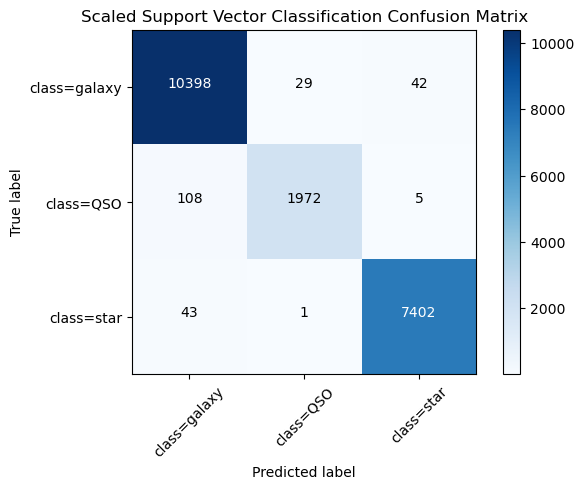

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Scaled Support Vector Classification Confusion Matrix')

## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)
rf1

RandomForestClassifier()

In [33]:
# Predict on the training data
y_train_pred = rf1.predict(x_train)
#yhat_train_prob = svm1.predict_proba(x_train)

# Predict on the test data
y_test_pred = rf1.predict(x_test)
#yhat_test_prob = svm1.predict_proba(x_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
#log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
#log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(rf1, X, data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", '-')

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):",'-')

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Random Forest Classifier",
           "Model Alias":"rf1",
           "Detail":"Default",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": '-',
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": '-',
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 1.0
Log Loss (Train): -

Metrics on Test Data:
Accuracy (Test): 0.99085
Log Loss (Test): -

Cross-Validated Accuracy (Test): 0.9910400000000001


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931
2,Support Vector Classifier,svm1,Default,0.918162,-,0.91310,-,0.78097
3,Support Vector Classifier,svm2,"Default, Scaled",0.990550,-,0.98860,-,0.98908
4,Random Forest Classifier,rf1,Default,1.000000,-,0.99085,-,0.99104


Confusion matrix, without normalization
[[10400    34    35]
 [  102  1981     2]
 [   10     0  7436]]


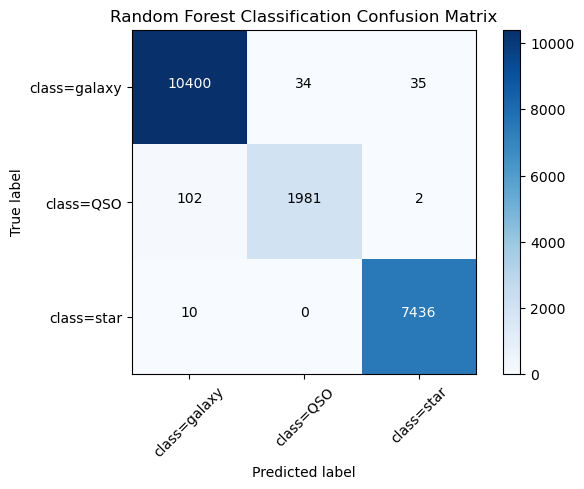

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Random Forest Classification Confusion Matrix')

### Random Forest Scaled

In [35]:
rf2 = RandomForestClassifier()
rf2.fit(x_train_scaled, y_train)
rf2

RandomForestClassifier()

In [36]:
# Predict on the training data
y_train_pred = rf2.predict(x_train_scaled)
#yhat_train_prob = svm1.predict_proba(x_train)

# Predict on the test data
y_test_pred = rf2.predict(x_test_scaled)
#yhat_test_prob = svm1.predict_proba(x_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
#log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
#log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(rf2, X_scaled, data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", '-')

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):",'-')

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Random Forest Classifier",
           "Model Alias":"rf2",
           "Detail":"Default, Scaled",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": '-',
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": '-',
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 1.0
Log Loss (Train): -

Metrics on Test Data:
Accuracy (Test): 0.99115
Log Loss (Test): -

Cross-Validated Accuracy (Test): 0.99142


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931
2,Support Vector Classifier,svm1,Default,0.918162,-,0.91310,-,0.78097
3,Support Vector Classifier,svm2,"Default, Scaled",0.990550,-,0.98860,-,0.98908
4,Random Forest Classifier,rf1,Default,1.000000,-,0.99085,-,0.99104
5,Random Forest Classifier,rf2,"Default, Scaled",1.000000,-,0.99115,-,0.99142


Confusion matrix, without normalization
[[10409    34    26]
 [  104  1979     2]
 [   11     0  7435]]


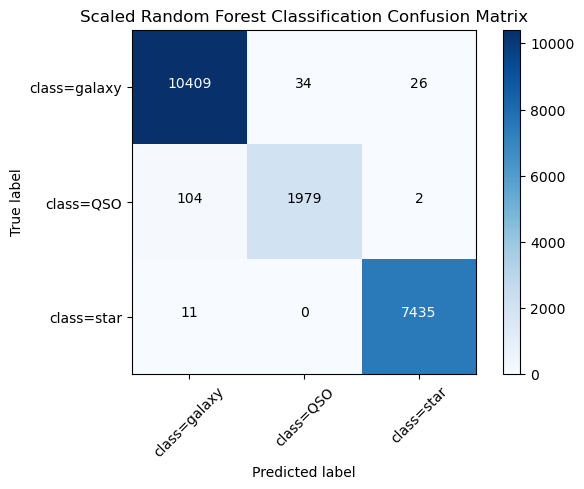

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Scaled Random Forest Classification Confusion Matrix')

# 5. Hyperparameter Tuning

Improving the Random Forest model performance with hyperparameter tuning.

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
max_features = ['auto', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param_grid = {'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [43]:
warnings.filterwarnings('ignore')
rf2 = RandomizedSearchCV(estimator=RandomForestClassifier(),
                         param_distributions=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         n_iter=30,
                         n_jobs=-1,
                         verbose=2,
                         random_state=1)

rf2.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [44]:
print ('Random grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf2.best_params_, ' \n')

Random grid:  {'max_features': ['auto', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}  



In [52]:
rf3 = RandomForestClassifier(min_samples_split=6, min_samples_leaf=1, max_features='auto', max_depth= 50, bootstrap=False)
rf3.fit(x_train_scaled, y_train)
rf3


RandomForestClassifier(bootstrap=False, max_depth=50, max_features='auto',
                       min_samples_split=6)

In [54]:
# Predict on the training data
y_train_pred = rf3.predict(x_train_scaled)
#yhat_train_prob = svm1.predict_proba(x_train)

# Predict on the test data
y_test_pred = rf3.predict(x_test_scaled)
#yhat_test_prob = svm1.predict_proba(x_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
#log_loss_train = log_loss(y_train, yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
#log_loss_test = log_loss(y_test, yhat_test_prob)

# Perform cross-validation on the test data and calculate mean accuracy
cross_val_scores = cross_val_score(rf3, X_scaled, data['class'], cv=5, scoring='accuracy')
cross_val_accuracy = np.mean(cross_val_scores)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", '-')

print("\nMetrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):",'-')

print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

new_row = {"Model":"Random Forest Classifier",
           "Model Alias":"rf3",
           "Detail":"min_samples_split=6, min_samples_leaf=1, max_features='auto', max_depth= 50, bootstrap=False",
           "Accuracy (Train)": accuracy_train,
           "Log Loss (Train)": '-',
           "Accuracy (Test)": accuracy_test,
           "Log Loss (Test)": '-',
           "Cross-validated Accuracy (Test)": cross_val_accuracy}

models_table = models_table.append(new_row, ignore_index=True)
models_table

Metrics on Training Data:
Accuracy (Train): 1.0
Log Loss (Train): -

Metrics on Test Data:
Accuracy (Test): 0.9915
Log Loss (Test): -

Cross-Validated Accuracy (Test): 0.9921599999999999


,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931
2,Support Vector Classifier,svm1,Default,0.918162,-,0.91310,-,0.78097
3,Support Vector Classifier,svm2,"Default, Scaled",0.990550,-,0.98860,-,0.98908
4,Random Forest Classifier,rf1,Default,1.000000,-,0.99085,-,0.99104
5,Random Forest Classifier,rf2,"Default, Scaled",1.000000,-,0.99115,-,0.99142
6,Random Forest Classifier,rf3,"min_samples_split=6, min_samples_leaf=1, max_f...",1.000000,-,0.99150,-,0.99217
7,Random Forest Classifier,rf3,"min_samples_split=6, min_samples_leaf=1, max_f...",1.000000,-,0.99150,-,0.99216


Confusion matrix, without normalization
[[10412    32    25]
 [  100  1983     2]
 [   11     0  7435]]


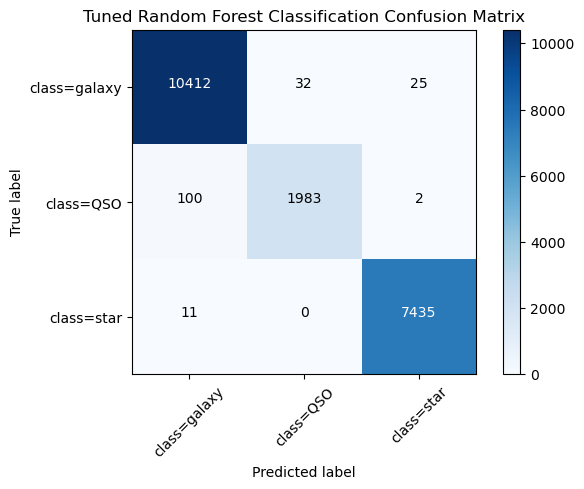

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=galaxy','class=QSO','class=star'],normalize= False,  title='Tuned Random Forest Classification Confusion Matrix')

# 6. Evaluate Model

In [58]:
models_table

,Model,Model Alias,Detail,Accuracy (Train),Log Loss (Train),Accuracy (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,lr1,Default,0.915412,0.342063,0.91395,0.35147,0.91400
1,Logistic Regression,lr2,"Default, Scaled",0.989838,0.050864,0.98840,0.058638,0.98931
2,Support Vector Classifier,svm1,Default,0.918162,-,0.91310,-,0.78097
3,Support Vector Classifier,svm2,"Default, Scaled",0.990550,-,0.98860,-,0.98908
4,Random Forest Classifier,rf1,Default,1.000000,-,0.99085,-,0.99104
5,Random Forest Classifier,rf2,"Default, Scaled",1.000000,-,0.99115,-,0.99142
6,Random Forest Classifier,rf3,"min_samples_split=6, min_samples_leaf=1, max_f...",1.000000,-,0.99150,-,0.99217


In this project, several machine learning models were trained and evaluated for the task of classifying galaxies, stars, and QSOs from SDSS data.

**Scaled vs Unscaled**: The performance of Logistic Regression (lr1 and lr2) and Support Vector Classifier (svm1 and svm2) models improved when the data was scaled. Specifically, the accuracy of lr2 increased to 98.84% from 91.40% of lr1, and the accuracy of svm2 increased to 98.86% from 91.31% of svm1.

**Model Comparison**: Among Logistic Regression (lr1 and lr2), Support Vector Classifier (svm1 and svm2), and Random Forest Classifier (rf1, rf2, rf3), the Random Forest Classifier models performed the best in terms of accuracy, achieving perfect training accuracy (100%) and high test accuracies (rf1: 99.09%, rf2: 99.12%, rf3: 99.18%). 

**Tuned vs Non-Tuned**: Tuning the parameters of the Random Forest Classifier (rf3) improved its performance compared to the non-tuned versions (rf1 and rf2). The test accuracy of rf3 increased to 99.18% from 99.09% of rf1 and 99.12% of rf2.

In conclusion, this project successfully implemented and evaluated several machine learning models for classifying astronomical objects. The tuned Random Forest Classifier (rf3) demonstrated the best performance.

# Thank You!